# Logistic Regression - the Iris Dataset

In [35]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

## Get the data

In [2]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

We want to classify the iris virginica type.

In [21]:
X = iris.data[:, 3:]
y = (iris.target == 2).astype(np.int)

In [53]:
X_pos_class = []
y_pos_class = []
X_neg_class = []
y_neg_class = []
for i in range(len(y)):
    if y[i] == 1:
        X_pos_class.append(X[i][0])
        y_pos_class.append(1)
    else:
        X_neg_class.append(X[i][0])
        y_neg_class.append(0)

## Train the model

In [24]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

## Plot the prediction

In [33]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

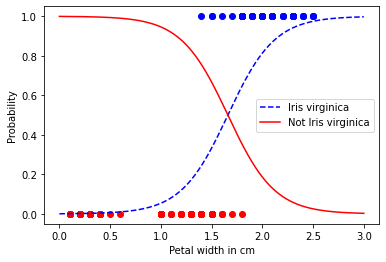

In [57]:
plt.plot(X_new, y_proba[:, 1], 'b--', label='Iris virginica')
plt.scatter(X_pos_class, y_pos_class, c='b')
plt.plot(X_new, y_proba[:, 0], label='Not Iris virginica', c='r')
plt.scatter(X_neg_class, y_neg_class, c='r')
plt.xlabel('Petal width in cm')
plt.ylabel('Probability')
plt.legend()
plt.show()

## Multiclass predictions with softmax regression

Now, we use both petal length and width as features and want to classify all three iris types (multiclass prediction) by using softmax regression.

In [60]:
X = iris.data[:, (2, 3)]
y = iris.target

In [63]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [64]:
softmax_reg.predict([[5, 2]])

array([2])

In [65]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])